# SVM

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Working with Perfectly Linear Dataset

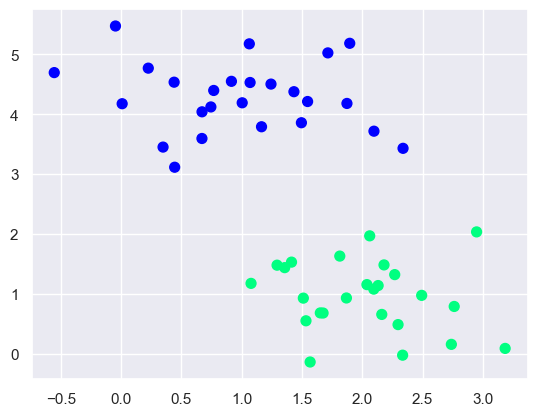

In [2]:
from sklearn.datasets import make_blobs

#from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

In [3]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

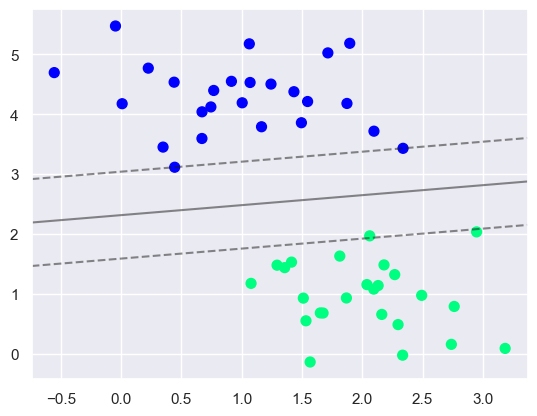

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

## The importance of Support Vectors

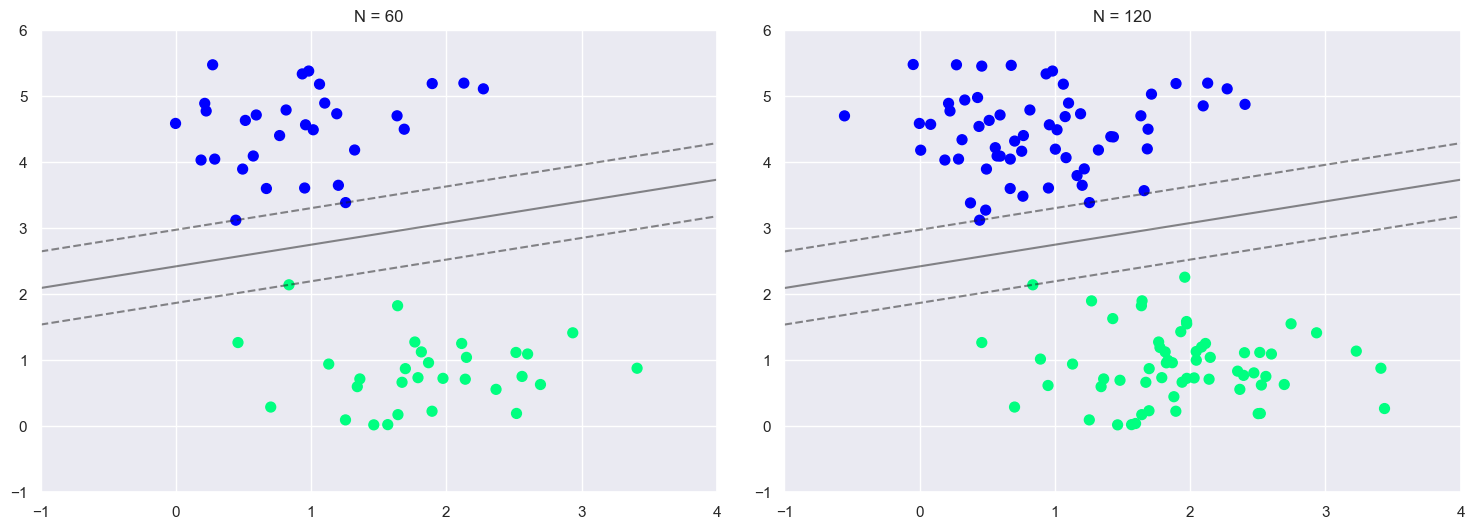

In [6]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Working with Almost Linearly Separable Dataset

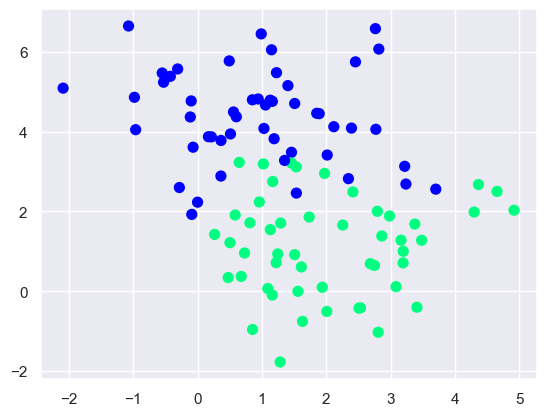

In [7]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

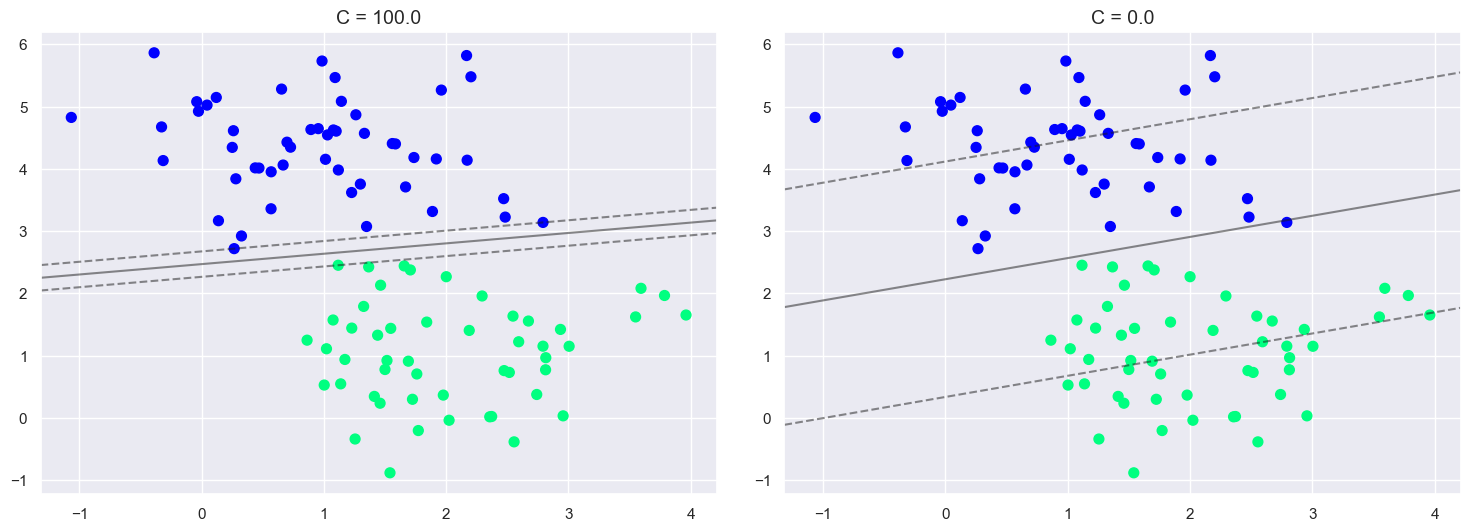

In [8]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Kernal Trick

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

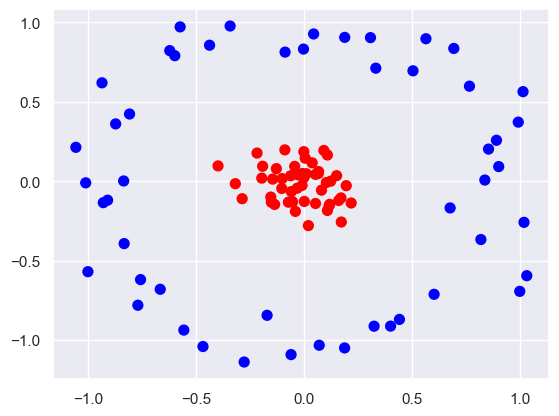

In [10]:
from sklearn.datasets import make_circles

#from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [12]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.45

In [14]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

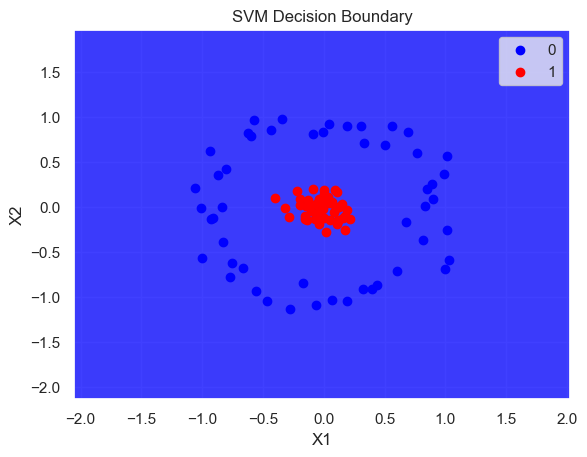

In [15]:
plot_decision_boundary(X, y, classifier)

In [16]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

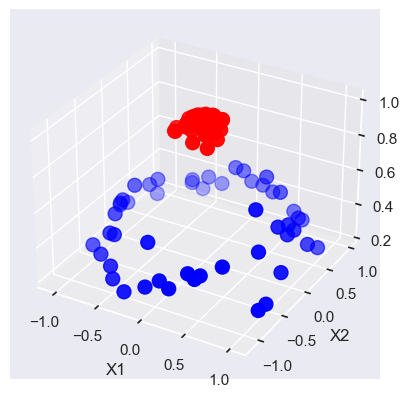

In [17]:
plot_3d_plot(X,y)

In [18]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

1.0

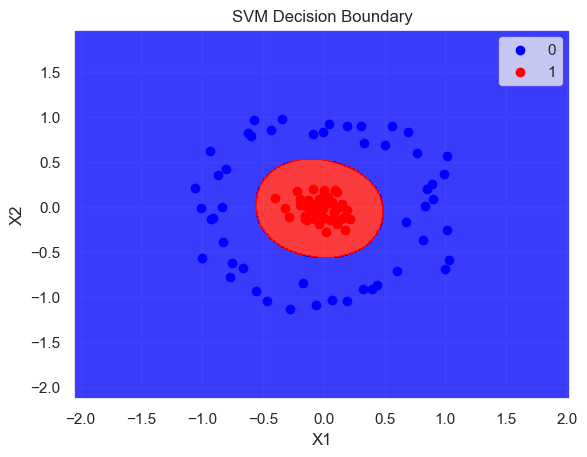

In [20]:
plot_decision_boundary(X, y, rbf_classifier)

In [21]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

1.0

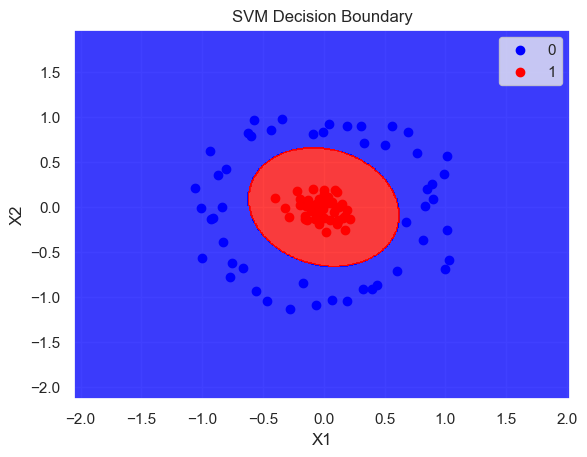

In [23]:
plot_decision_boundary(X, y, poly_classifier)

In [24]:
X

array([[ 1.87599637e-01, -1.04898203e+00],
       [-6.19064264e-02,  3.41542921e-02],
       [ 1.08131180e-01, -1.83828858e-01],
       [-1.02939237e-01, -4.54198931e-02],
       [ 2.00847972e-02, -2.79137296e-01],
       [ 5.44346855e-03,  1.44682178e-01],
       [-1.91625269e-01,  9.42760386e-02],
       [-2.76948523e-01, -1.13741700e+00],
       [ 6.61475183e-02,  4.89497974e-02],
       [-2.17424353e-01,  1.77161888e-01],
       [-2.56170406e-03,  8.31441767e-01],
       [-5.73097851e-01,  9.70939617e-01],
       [ 1.01289322e+00,  5.63534794e-01],
       [ 6.92706911e-01,  8.35279176e-01],
       [ 8.53368369e-01,  2.02155934e-01],
       [-6.65250620e-01, -6.79724976e-01],
       [-6.00110087e-02, -1.09080564e+00],
       [-8.71383046e-01,  3.60568281e-01],
       [ 4.41251105e-01, -8.69411366e-01],
       [-1.01151151e-01,  1.64151376e-02],
       [ 4.00225781e-01, -9.11610602e-01],
       [-5.39674474e-02, -1.30934156e-01],
       [ 5.30539041e-02, -1.40117690e-01],
       [-9.

In [25]:
np.exp(-(X**2)).sum(1)

array([1.29816865, 1.99500909, 1.9551473 , 1.98739862, 1.9246373 ,
       1.97925501, 1.95509718, 1.20041659, 1.99324085, 1.92292774,
       1.50092018, 1.10961062, 1.08636947, 1.11661373, 1.44271584,
       1.27239676, 1.30066994, 1.34607707, 1.29267847, 1.98955119,
       1.28758853, 1.98009412, 1.97774775, 1.0913843 , 1.49850064,
       1.97756528, 1.30711169, 1.23528892, 1.36054034, 1.96672533,
       1.98934061, 1.96023224, 1.961835  , 1.29915826, 1.17535508,
       1.42383958, 1.96008929, 1.24627168, 1.96213226, 1.40428416,
       1.39294091, 1.14993018, 1.9807443 , 1.99763362, 1.9774917 ,
       1.96311226, 1.95401951, 1.35193556, 1.29048075, 1.84432954,
       1.60559027, 1.9852889 , 1.35750569, 1.38860899, 1.96508506,
       1.99034933, 1.50931074, 1.46210785, 1.33989345, 1.33557888,
       1.90931721, 0.98824229, 1.18902115, 1.49686656, 1.14279037,
       1.99952141, 1.99768935, 1.99176321, 1.98491335, 1.93500309,
       1.43604144, 1.96155443, 1.9036743 , 1.99529707, 1.35764

In [26]:
X_new=np.exp(-(X**2))

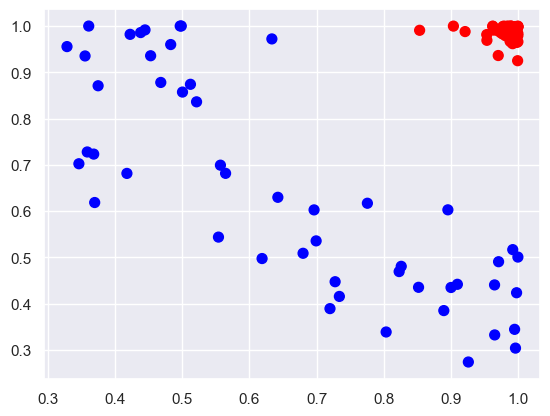

In [27]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')

# MATH

In [28]:
import plotly.graph_objects as go
import numpy as np

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = x**2 * y

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='3D Plot of the function f(x, y) = x^2y', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


In [29]:
import plotly.graph_objects as go
import numpy as np

# Create a set of points that lie on the circle
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

# Create the plot
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'))

# Set the aspect ratio to equal so the circle doesn't look like an ellipse
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()


In [30]:
import plotly.graph_objects as go
import numpy as np

# Create grid for the function
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(x, y)
z = x**2 * y

# Create a set of points that lie on the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
z_circle = x_circle**2 * y_circle

# Create the surface plot for the function
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='Viridis', opacity=0.8)])

# Add the circle to the plot
fig.add_trace(go.Scatter3d(x=x_circle, y=y_circle, z=z_circle, mode='lines'))

fig.show()


In [31]:
import plotly.graph_objects as go
import numpy as np

# Create grid for the function
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(x, y)
z = x**2 * y

# Create a set of points that lie on the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Create the contour plot for the function
fig = go.Figure(data=go.Contour(x=x[0,:], y=y[:,0], z=z))

# Add the circle to the plot
fig.add_trace(go.Scatter(x=x_circle, y=y_circle, mode='lines', 
                         line=dict(color='white')))

# Set aspect ratio
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    yaxis=dict(scaleanchor="x", scaleratio=1),
)

fig.show()


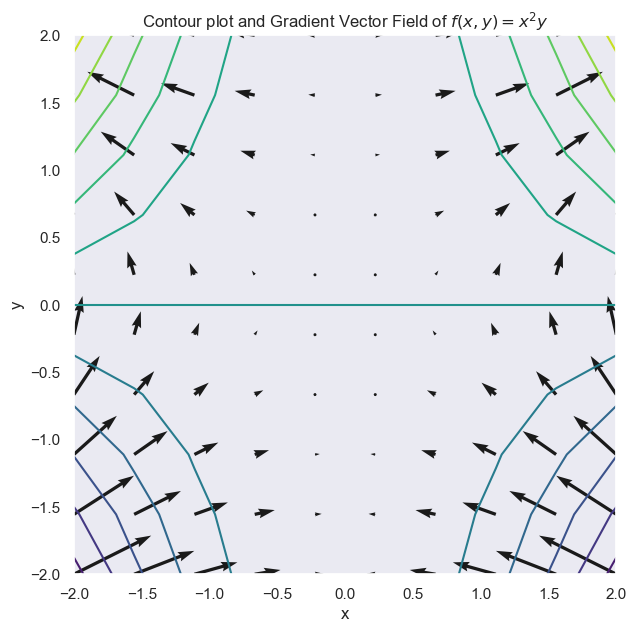

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)

X, Y = np.meshgrid(x, y)

# Compute the function values
Z = X**2 * Y

# Compute the gradient
U = 2*X*Y
V = X**2

plt.figure(figsize=(7, 7))

# Draw the contour plot
plt.contour(X, Y, Z, levels=10, cmap='viridis')

# Draw the gradient vector field
plt.quiver(X, Y, U, V)

plt.title('Contour plot and Gradient Vector Field of $f(x, y) = x^2y$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


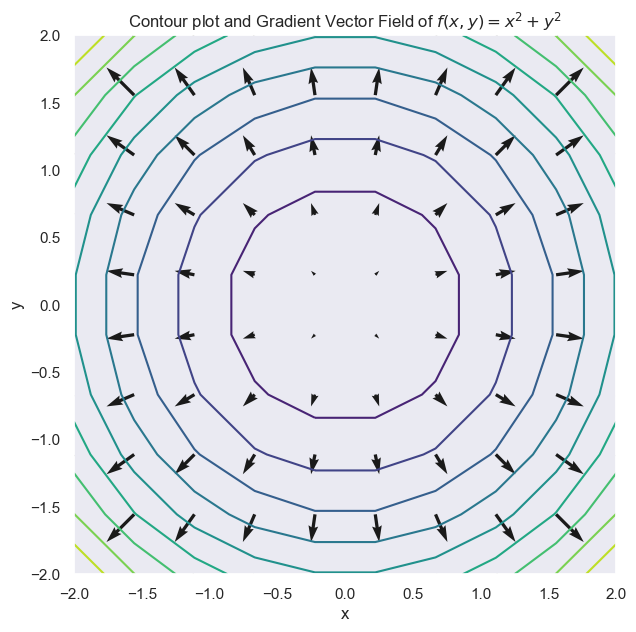

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)

X, Y = np.meshgrid(x, y)

# Compute the function values
Z = X**2 + Y**2

# Compute the gradient
U = 2*X
V = 2*Y

plt.figure(figsize=(7, 7))

# Draw the contour plot
plt.contour(X, Y, Z, levels=10, cmap='viridis')

# Draw the gradient vector field
plt.quiver(X, Y, U, V)

plt.title('Contour plot and Gradient Vector Field of $f(x, y) = x^2 + y^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


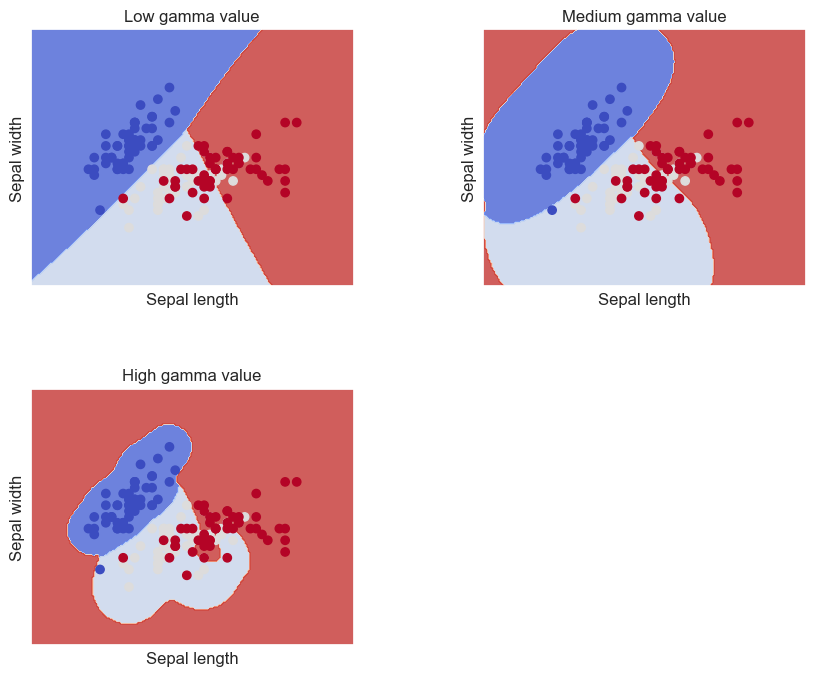

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=42)

# Title for the plots
titles = ['Low gamma value', 'Medium gamma value', 'High gamma value']

# Different gamma values to experiment with
gamma_values = [0.1, 1, 10]

# SVM regularization parameter
C = 1.0

plt.figure(figsize=(10, 8))

for i, gamma in enumerate(gamma_values):
    # Fit the model
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=C)
    clf.fit(X_train, y_train)

    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Predict and reshape
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()
